In [1]:
import pandas as pd
data = pd.read_csv('num_data.csv')
data

,sub_ms_class,frontge_lot,area_lot,shape_lot,slopeland,style_house,ovl_quality,ovl_condition,year_constructed,year_remod,...,configlot_Inside,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,type_building_2fmCon,type_building_Duplex,type_building_Twnhs,type_building_TwnhsE,saleprice
0,45,55.0,4388,1,1,2,5,7,1930,1950,...,1,0,0,0,1,0,0,0,0,87000
1,20,80.0,9600,0,1,1,7,6,1973,1973,...,1,0,0,0,1,0,0,0,0,175500
2,30,50.0,5330,0,1,1,4,7,1940,1950,...,1,0,0,0,1,0,0,0,0,82500
3,70,57.0,9906,0,1,4,4,4,1925,1950,...,1,0,0,0,1,0,0,0,0,107000
4,120,64.0,5587,1,2,1,8,5,2008,2008,...,1,0,0,0,1,0,0,0,1,392500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,75,75.0,13500,0,1,5,10,9,1893,2000,...,1,0,0,0,1,0,0,0,0,325000
1440,60,78.0,10140,0,1,4,7,5,1976,1976,...,1,0,0,0,1,0,0,0,0,162900
1441,20,124.0,16158,1,2,1,7,5,2005,2005,...,1,0,0,0,1,0,0,0,0,260000
1442,20,93.0,12085,0,1,1,8,5,2007,2007,...,1,0,0,0,1,0,0,0,0,318000


In [2]:
X = data.drop('sub_ms_class', axis=1)
y = data['sub_ms_class']

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        bootstrap=False, 
        min_samples_leaf=1, 
        min_samples_split=2, 
        n_estimators=100, 
        random_state=42
    )
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.962

Classification Report:
              precision    recall  f1-score   support

          20       0.97      0.99      0.98       103
          30       1.00      1.00      1.00        11
          40       0.00      0.00      0.00         1
          45       1.00      1.00      1.00         1
          50       0.91      0.94      0.92        32
          60       0.97      0.99      0.98        71
          70       0.94      0.94      0.94        16
          80       0.91      0.91      0.91        11
          85       1.00      0.75      0.86         4
          90       1.00      1.00      1.00        12
         120       0.92      0.92      0.92        12
         160       1.00      1.00      1.00         9
         180       1.00      1.00      1.00         1
         190       1.00      0.60      0.75         5

    accuracy                           0.96       289
   macro avg       0.90      0.86      0.88       289
weighted avg       0.96      0.96      0

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
y.value_counts()

sub_ms_class
20     530
60     293
50     144
120     86
30      69
160     62
70      60
80      57
90      51
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

### Feature Importance

The bar plot shows the importance of each feature. Feature importance is computed based on how much each feature contributes to reducing impurity across all trees in the forest. Features with higher importance scores are more influential in the model's predictions.


C:\Users\hp\AppData\Local\Temp\ipykernel_14640\2877192183.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df[:20], palette='viridis')


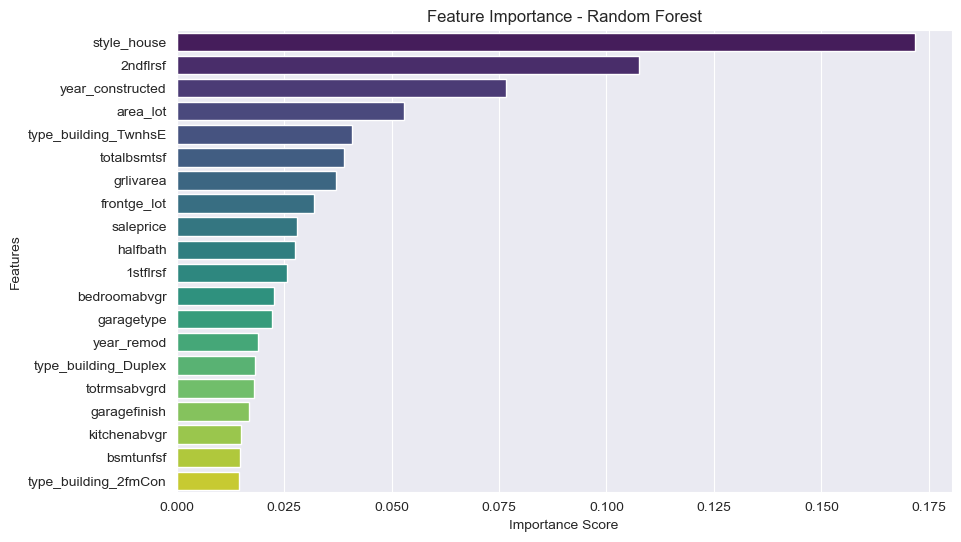

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.named_steps['randomforestclassifier'].feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:20], palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
# plt.savefig('plots/Feature_Importance__Random_Forest.png')
plt.show()